In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# The impact of ridge vs lasso regularization

In this notebook, we will explore the impact of ridge vs lasso regression as well the impact of the alpha parameter.

We will do so by generating a dataset through a linear process such that we should be able to fit a linear regression to it easily. We will then make copies of this dataset, one by adding noise and one by making some of the variables redundant. We should be able to fit the original dataset w/out regularization. Ridge should work better on the one that has noise and lasso should improve the one w/ redundant features.

Note that we are not bothering to split our data. We're not trying to make predictions, we're trying to make a point.

### Dataset Generation

In [2]:
from sklearn.datasets import make_regression

In [60]:
def generate_dataset():
    # This generates data according to a linear models with coefficents coef
    # Our goal is to find coef from the (X, y) coordinates

    # It is a standard practice to set the random seed at the beginning of an experiment to make it repeatable
    # It is also common to set it to 42. If you don't know why, I encourage you to find out
    X, y, coef = make_regression(n_samples=10, n_features=10, n_informative=8, coef=True, noise=10, random_state=42)

    # add noise from a gaussian distribution
    X_noisy = X.copy()
    noise_level = 1  # Adjust the noise level as desired
    noise = np.random.normal(0, noise_level, X.shape)
    X_noisy = X + noise
    

    # add redundancy by making five of the features collinear
    # now five of the features are just a multiple of the other five and so provide no additional information
    X_redundant = X.copy()
    X_redundant[:, 5:10] = X_redundant[:, :5]

    return X, X_noisy, X_redundant, y

# Assignment

I will fit a model without regularization to the original data. We will evaluate these models using Mean Absolute Percentage Error and rmse.
  * For both of these models smaller is better
  * MAPE is a percentage. It can go to zero but it can also be arbitrarily large
  * rmse is on the same order of magnitude as the original data

You will
  * For the noisy and redundant datasets
    * Plot all three models and their rmse on the same plot with alpha = 1
        * Call the model constructor with the named parameter alpha
        * Call the model.fit and predict methods 
    * For alpha values in [0, 0.1, 0.2, ..., 1] (`np.arange(0, 1.1, .1)`)
      * use the appropriate model
      * Plot the rmse of each alpha (on a single plot)
      * Plot the models for alpha = [0, 0.3, 0.6, 1] on a single plot
     
How big of an effect does the choice of alpha have? Is there a clear winner?

To do the plotting, we will use the `matplotlib.pyplot` functions:
  * `plot` to draw a line plot of the regression, and
  * `scatter` to draw a scatter plot of the inputs. 

`matplotlib.pyplot` is always imported as `plt`. Don't forget to `plt.show()` when you are done.

In [22]:
def plot_linear(predictions, y):
    plt.scatter(range(len(y)), y, label="Actual", marker="x", color="r")
    plt.plot(predictions, label=f"Predicted Alpha: 0, RMSE: 0")
    plt.title("Linear Model")
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    # set the position of the xticks and their values
    plt.xticks(range(len(y)), range(1, len(y)+1))
    plt.legend()
    plt.show()

In [62]:
# We will make use of the nightmare that is global scope here, b/c it is also the best way to handle the data science workflow
# Life is all about choices...
X, X_noisy, X_redundant, y = generate_dataset()

In [6]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse

In [64]:
# first call the constructor
# the ridge and lasso constructors take the named parameter alpha
regressor = LinearRegression()

# all sklearn models have fit and predict functions
regressor.fit(X, y)
prediction = regressor.predict(X)
print(f"RMSE: {rmse(y, prediction):0.3f}")

RMSE: 0.000


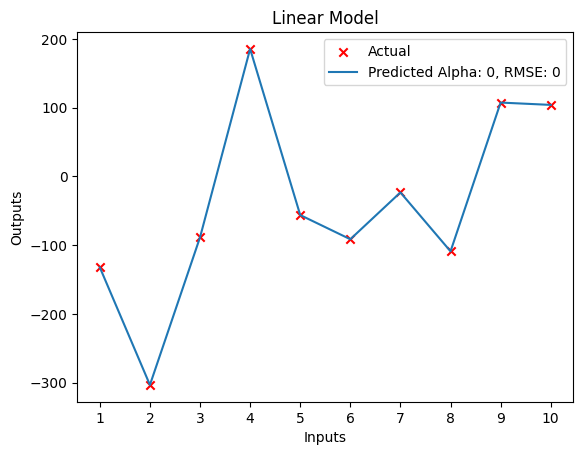

In [65]:
plot_linear(prediction, y)

#### We tried to fit a linear regression to a linear model and, unsurprisingly, it worked

### Note that 1, 2, 3, ... are not the inputs themselves, they are the order of the inputs

# Your turn

In [83]:
def plot_rmses(dataset_name, rmses):
    plt.scatter(np.arange(0, 1.1, 0.1), rmses, marker="x", color="r")
    plt.plot(np.arange(0, 1.1, 0.1), rmses)
    plt.title(f"{dataset_name} RMSEs")
    plt.xlabel("Alpha")
    plt.ylabel("RMSE")
    plt.show()

In [88]:
def plot_alphas(dataset_name, alpha_preds, y):
    # alpha_preds is a list of lists of predictions
    plt.scatter(range(len(y)), y, label="Actual", marker="x", color="r")
    alphas = [0, .3, .6, 1]
    for i, pred in enumerate(alpha_preds):
        plt.plot(pred, label=f"alpha: {alphas[i]}")
    plt.title(f"{dataset_name} predictions")
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    # set the position of the xticks and their values
    plt.xticks(range(len(y)), range(1, len(y)+1))
    plt.legend()
    plt.show()

In [70]:
def plot_models(dataset_name, linear_preds, lasso_preds, ridge_preds, y):
    plt.scatter(range(len(y)), y, label="Actual", marker="x", color="r")
    plt.plot(linear_preds, label=f"Linear: {rmse(y, linear_preds):0.3f}")
    plt.plot(lasso_preds, label=f"Lasso: {rmse(y, lasso_preds):0.3f}")
    plt.plot(ridge_preds, label=f"Ridge: {rmse(y, ridge_preds):0.3f}")
    plt.title(f"{dataset_name} models")
    plt.xlabel("Inputs")
    plt.ylabel("Outputs")
    # set the position of the xticks and their values
    plt.xticks(range(len(y)), range(1, len(y)+1))
    plt.legend()
    plt.show()

#### Noisy

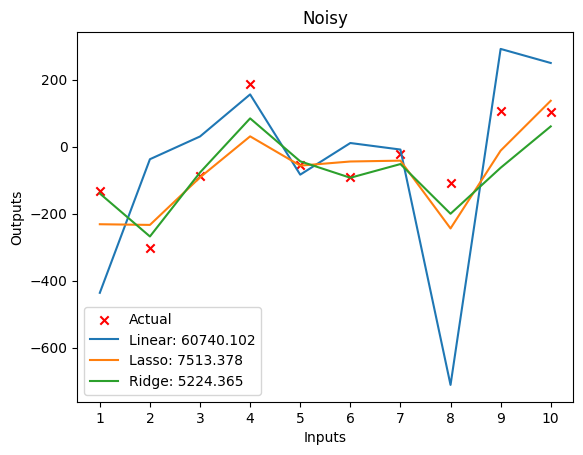

In [66]:
linear = LinearRegression()
lasso = Lasso(alpha=1)
ridge = Ridge(alpha=1)

linear.fit(X_noisy, y)
lasso.fit(X_noisy, y)
ridge.fit(X_noisy, y)

linear_preds = linear.predict(X)
lasso_preds = lasso.predict(X)
ridge_preds = ridge.predict(X)

plot_models("Noisy", linear_preds, lasso_preds, ridge_preds, y)

In [ ]:
preds = []
rmses = []
for alpha in np.arange(0, 1.1, 0.1):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_noisy, y)
    ridge_preds = ridge.predict(X)
    if any([alpha - num > 0.0001 for num in [0, .3, .6, 1]]):
        preds.append(ridge_preds)
    rmses.append(rmse(y, ridge_preds))
plot_rmses("Noisy", rmses)
plot_alphas("Noisy", preds, y)

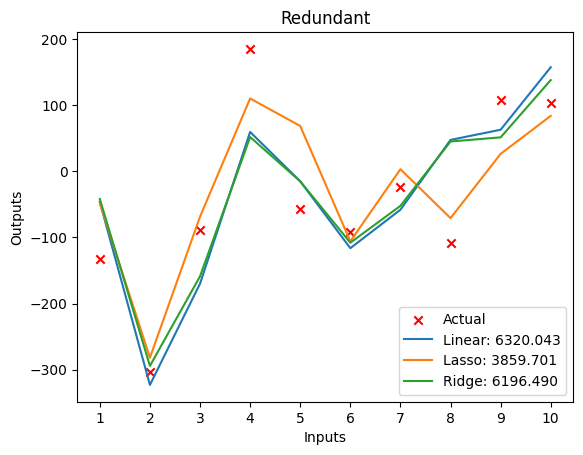

In [67]:
linear = LinearRegression()
lasso = Lasso(alpha=1)
ridge = Ridge(alpha=1)

linear.fit(X_redundant, y)
lasso.fit(X_redundant, y)
ridge.fit(X_redundant, y)

linear_preds = linear.predict(X)
lasso_preds = lasso.predict(X)
ridge_preds = ridge.predict(X)

plot_models("Redundant", linear_preds, lasso_preds, ridge_preds, y)